# Detroit Crime and Weather Data Marge

In [1]:
!pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Daily Crime Weather Data Merge

In [2]:
# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Point, Daily

# Set time period
start = datetime(2017, 1, 1)
end = datetime(2022, 12, 31)

# Create Point for Detriot, MI
location = Point(42.348495, -83.060303, 70)

# Get daily data from 2017 to 2022
df_weather = Daily(location, start, end)
df_weather = df_weather.fetch()

# Dropping 'Wind Peak Gust' and 'Total Sunshine Duration' columns
df_weather = df_weather.drop(columns=['wdir',	'wspd', 'pres', 'wpgt','tsun'])

# Convert Celsius to Fehrenheit
df_weather = df_weather.assign(tavg = lambda x: (9/5)*x['tavg']+32,
                   tmin = lambda x: (9/5)*x['tmin']+32,
                   tmax = lambda x: (9/5)*x['tmax']+32)

df_weather = df_weather.reset_index(level=0)

df_weather.head()

,time,tavg,tmin,tmax,prcp,snow
0,2017-01-01,32.18,26.24,41.18,0.0,0.0
1,2017-01-02,35.06,27.32,42.26,1.4,0.0
2,2017-01-03,41.00,39.20,44.24,0.8,0.0
3,2017-01-04,26.60,19.22,39.20,2.8,0.0
4,2017-01-05,17.60,13.28,20.30,2.2,30.0


In [3]:
import pandas as pd

df_crime = pd.read_csv("https://media.githubusercontent.com/media/kyle-w-brown/detroit-crime-prediction-auto-arima/main/data/daily_crime_totals.csv")
df_crime.columns = ['time', 'number_of_crimes']
df_crime.head()

,time,number_of_crimes
0,2017-01-01,343
1,2017-01-02,239
2,2017-01-03,207
3,2017-01-04,218
4,2017-01-05,182


In [16]:
df_crime['time'] = pd.to_datetime(df_crime['time'])

daily_crime_weather = pd.merge(df_crime, df_weather, how='left',on='time')

# Set 'time' back to index
daily_crime_weather = daily_crime_weather.set_index('time')
daily_crime_weather.head()

,number_of_crimes,tavg,tmin,tmax,prcp,snow
time,,,,,,
2017-01-01,343,32.18,26.24,41.18,0.0,0.0
2017-01-02,239,35.06,27.32,42.26,1.4,0.0
2017-01-03,207,41.00,39.20,44.24,0.8,0.0
2017-01-04,218,26.60,19.22,39.20,2.8,0.0
2017-01-05,182,17.60,13.28,20.30,2.2,30.0


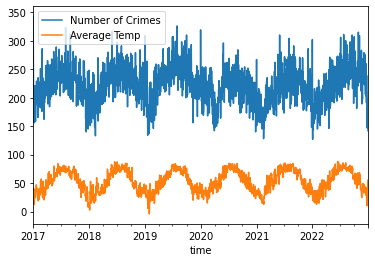

In [17]:
import matplotlib.pyplot as plt

daily_crime_weather['number_of_crimes'].plot();
daily_crime_weather['tavg'].plot();
plt.legend(['Number of Crimes','Average Temp'])
plt.show();


In [19]:
daily_crime_weather.to_csv('detroit_daily_crime_weather_2017-2022.csv')

# Hourly Crime Data Weather Merge

In [5]:
df = pd.read_csv("https://media.githubusercontent.com/media/kyle-w-brown/detroit-crime-prediction-auto-arima/main/data/hourly_crime_totals.csv")
df.columns = ['time', 'number_of_crimes']
df.head()

,time,number_of_crimes
0,2017-01-01 00:00:00,4
1,2017-01-01 01:00:00,5
2,2017-01-01 02:00:00,11
3,2017-01-01 03:00:00,7
4,2017-01-01 04:00:00,5


In [10]:
from meteostat import Hourly

# Set time period
start = datetime(2017, 1, 1)
end = datetime(2022, 12, 31, 23, 00)

# Get hourly data
data = Hourly('72537', start, end)
data = data.fetch()

data = data.drop(columns=['dwpt', 'rhum', 'wdir', 'wspd', 'pres', 'coco', 'wpgt','tsun'])

# Convert Celsius to Fehrenheit
data = data.assign(temp = lambda x: (9/5)*x['temp']+32)
data = data.reset_index(level=0)

# Print DataFrame
data.head()

,time,temp,prcp,snow
0,2017-01-01 00:00:00,37.04,NaN,NaN
1,2017-01-01 01:00:00,35.60,0.0,NaN
2,2017-01-01 02:00:00,35.96,0.0,NaN
3,2017-01-01 03:00:00,35.06,0.0,NaN
4,2017-01-01 04:00:00,33.98,0.0,NaN


In [15]:
df['time'] = pd.to_datetime(df['time'])

hourly_crime_weather = pd.merge(df, data, how='left',on='time')

# Set 'time' back to index
hourly_crime_weather = hourly_crime_weather.set_index('time')
hourly_crime_weather.head()

,number_of_crimes,temp,prcp,snow
time,,,,
2017-01-01 00:00:00,4,37.04,NaN,NaN
2017-01-01 01:00:00,5,35.60,0.0,NaN
2017-01-01 02:00:00,11,35.96,0.0,NaN
2017-01-01 03:00:00,7,35.06,0.0,NaN
2017-01-01 04:00:00,5,33.98,0.0,NaN


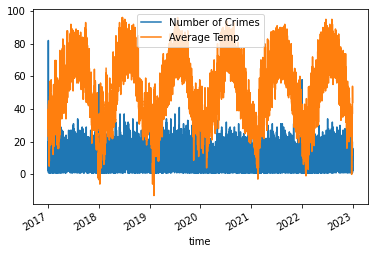

In [18]:
hourly_crime_weather['number_of_crimes'].plot();
hourly_crime_weather['temp'].plot();
plt.legend(['Number of Crimes','Average Temp'])
plt.show();

In [20]:
hourly_crime_weather.to_csv('detroit_hourly_crime_weather_2017-2022.csv')